In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 25)

Shape of X is (25,)
Head of X is [ 0.06289475  0.1257895   0.15094739  0.63523695  0.95600017  1.18242126
  1.28934233  1.30192128  1.61639502  1.67300029]


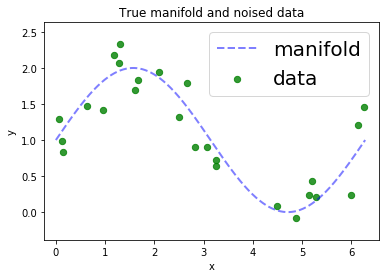

In [3]:
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, lw=2, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

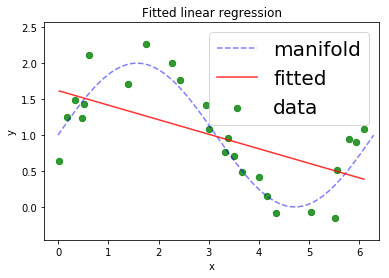

In [9]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
# Полиномиальная регрессия

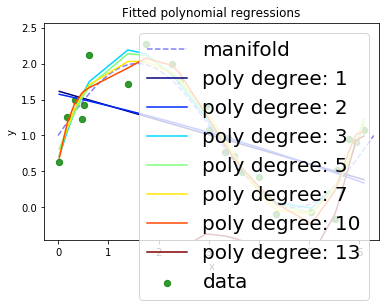

In [40]:
# список степеней p полиномов, который мы протестируем
degree_list = [1, 2, 3, 5, 7, 10, 13]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 
